### HEART FAILURE PREDICTION USING KNN & LOGISTIC REGRESSION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("/home/user/Desktop/ml_projects/git_projects/KNN/heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.shape

(299, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:>

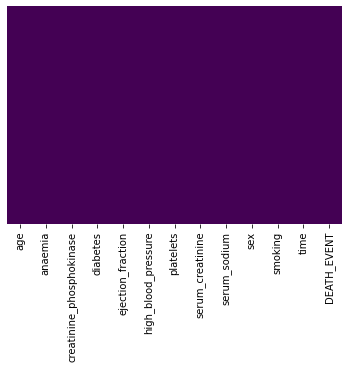

In [17]:
sns.heatmap(data.isna(),yticklabels =False ,cbar=False , cmap='viridis')

In [14]:
?sns.heatmap

<AxesSubplot:>

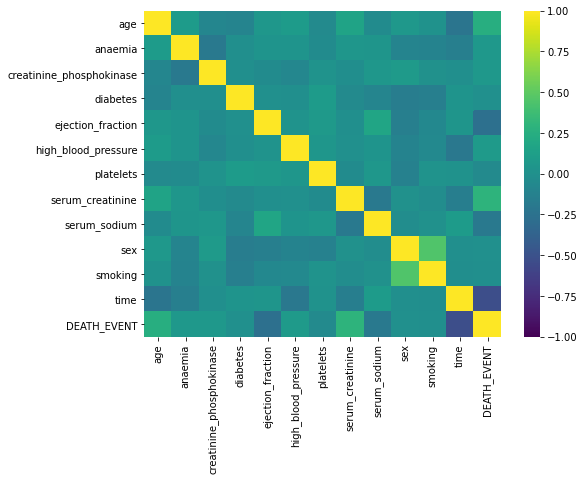

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='viridis',vmin=-1)

In [31]:
data.corr()[abs(data.corr()['DEATH_EVENT'])>0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

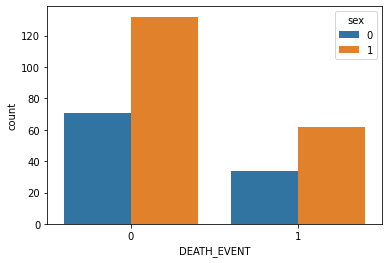

In [32]:
sns.countplot(x='DEATH_EVENT',hue='sex',data=data)

In [34]:
print(data['anaemia'].value_counts())
print(data['diabetes'].value_counts())
print(data['high_blood_pressure'].value_counts())
print(data['smoking'].value_counts())

0    170
1    129
Name: anaemia, dtype: int64
0    174
1    125
Name: diabetes, dtype: int64
0    194
1    105
Name: high_blood_pressure, dtype: int64
0    203
1     96
Name: smoking, dtype: int64


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

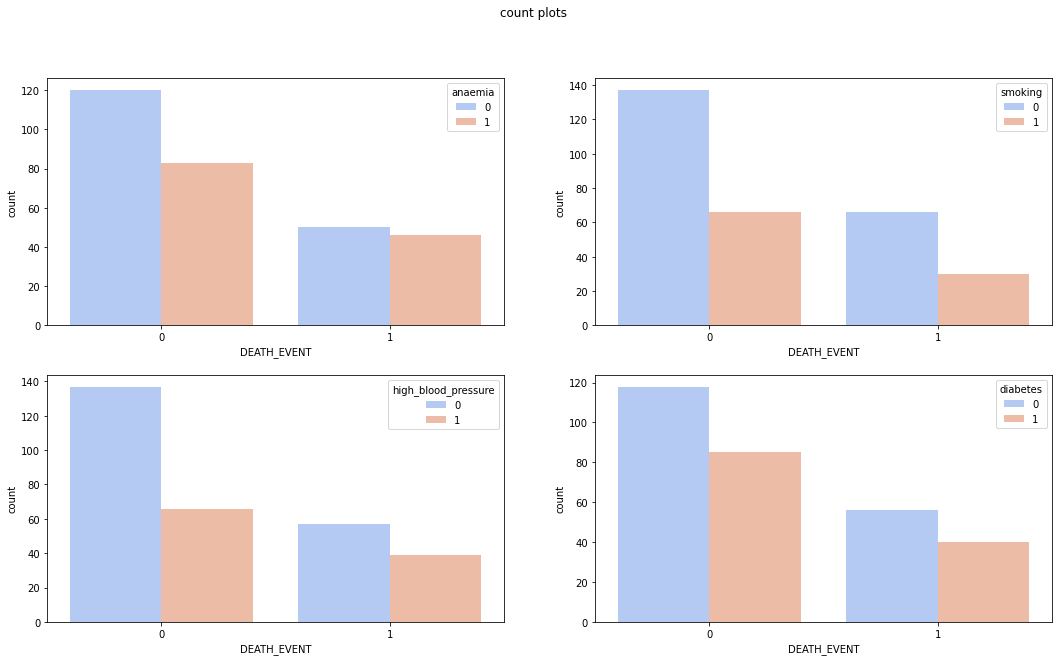

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('count plots')

sns.countplot(ax=axes[0, 0],x='DEATH_EVENT',hue='anaemia',data=data,palette='coolwarm')# should stay
sns.countplot(ax=axes[0, 1],x='DEATH_EVENT',hue='smoking',data=data,palette='coolwarm')# can be removed
sns.countplot(ax=axes[1, 0],x='DEATH_EVENT',hue='high_blood_pressure',data=data,palette='coolwarm')# should stay
sns.countplot(ax=axes[1, 1],x='DEATH_EVENT',hue='diabetes',data=data,palette='coolwarm') #can be removed

In [37]:
data[data['platelets']>600000]['DEATH_EVENT']

105    1
109    0
296    0
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

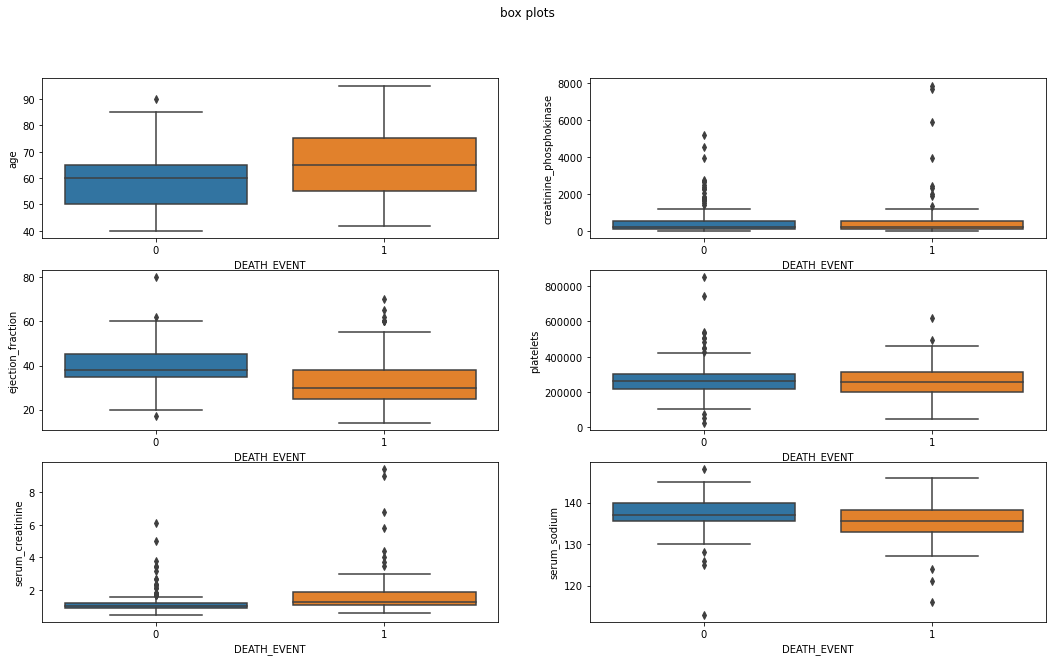

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('box plots')

sns.boxplot(ax=axes[0, 0],x='DEATH_EVENT',y='age',data=data)
sns.boxplot(ax=axes[0, 1],x='DEATH_EVENT',y='creatinine_phosphokinase',data=data)
sns.boxplot(ax=axes[1, 0],x='DEATH_EVENT',y='ejection_fraction',data=data)
sns.boxplot(ax=axes[1, 1],x='DEATH_EVENT',y='platelets',data=data) # is this feature useful in predicting?
sns.boxplot(ax=axes[2, 0],x='DEATH_EVENT',y='serum_creatinine',data=data)
sns.boxplot(ax=axes[2, 1],x='DEATH_EVENT',y='serum_sodium',data=data)

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

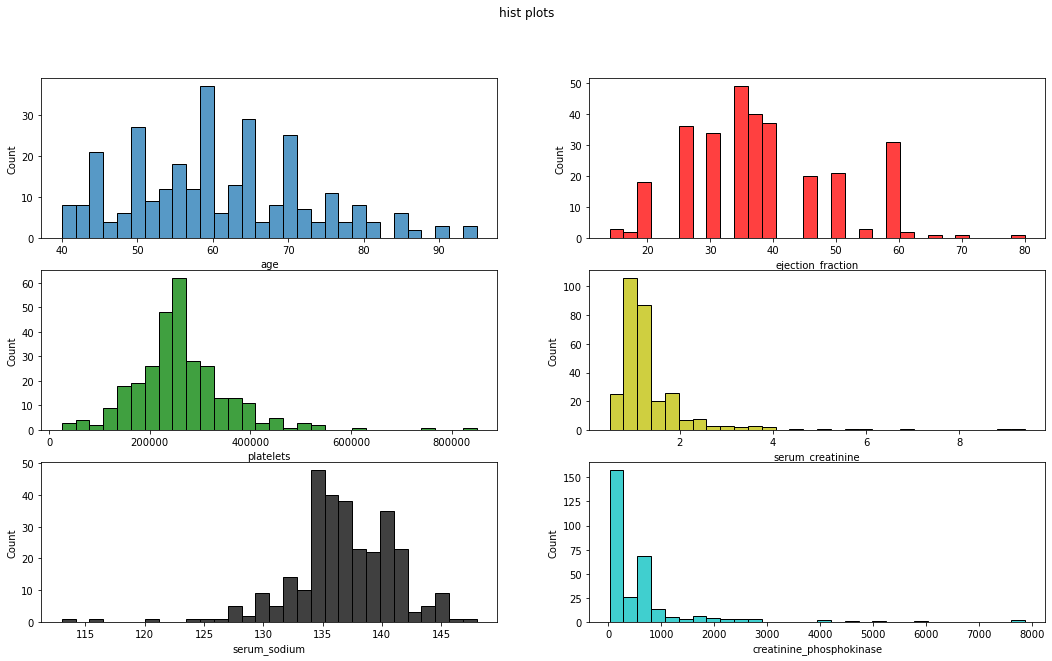

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('hist plots')

sns.histplot(data['age'],ax=axes[0,0],bins=30)
sns.histplot(data['ejection_fraction'],ax=axes[0, 1],bins=30,color='r')#drop greater than 60
sns.histplot(data['platelets'],ax=axes[1, 0],bins=30,color='g')#get rid of greater than 600000
sns.histplot(data['serum_creatinine'],ax=axes[1, 1],bins=30,color='y') # i think we should keep it/ train model and then remove it and check again
sns.histplot(data['serum_sodium'],ax=axes[2, 0],bins=30,color='k') # get rid of things below 125
sns.histplot(data['creatinine_phosphokinase'],ax=axes[2, 1],bins=30,color='c') # drop greater than 3000

<AxesSubplot:xlabel='time', ylabel='Count'>

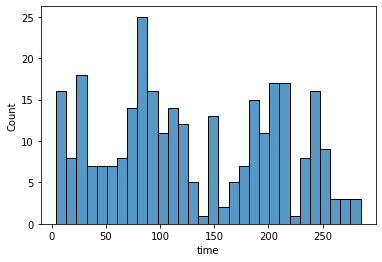

In [40]:
sns.histplot(x='time',data=data,bins=30)

### Splitting Data & Feature Scaling 

In [42]:
x = data[['ejection_fraction','serum_creatinine','time','serum_sodium','age']]
y = data['DEATH_EVENT']

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
scalerer = StandardScaler()
scalerer.fit(x)
scaled_feature = scalerer.transform(x)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature,data['DEATH_EVENT'],
                                                    test_size=0.30)

### K NEAREST NEIGHBORS CLASSIFIER 

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [48]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[50  9]
 [ 9 22]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        59
           1       0.71      0.71      0.71        31

    accuracy                           0.80        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.80      0.80      0.80        90



In [49]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

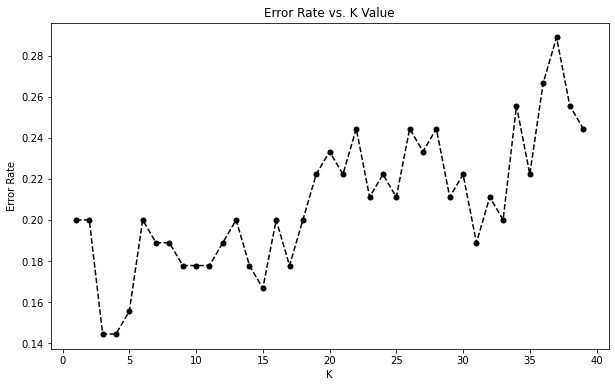

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='k', linestyle='dashed', marker='o',
         markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [51]:
# NOW WITH K=19
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=19')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=19


[[55  4]
 [16 15]]


              precision    recall  f1-score   support

           0       0.77      0.93      0.85        59
           1       0.79      0.48      0.60        31

    accuracy                           0.78        90
   macro avg       0.78      0.71      0.72        90
weighted avg       0.78      0.78      0.76        90



### Logistic Regression 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature,data['DEATH_EVENT'],
                                                    test_size=0.30)

In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [54]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[58  3]
 [10 19]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        61
           1       0.86      0.66      0.75        29

    accuracy                           0.86        90
   macro avg       0.86      0.80      0.82        90
weighted avg       0.86      0.86      0.85        90



In [ ]:
#END